# ch04.01. 회귀문제 EDA - mpg
---
* 날짜: 2022.05.10
* 이름: 윤태우

## 학습내용
    - mpg 데이터 EDA
    - 회귀문제 에서의 탐색적 데이터 분석 진행

## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [ ]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

* seaborn에서 제공하는 `mpg` 데이터셋을 불러오기

In [ ]:
df = sns.load_dataset('mpg')
df.shape
# 데이터 개수 : 398개 (이렇게 데이터 개수가 적으면 딥러닝 모델 보다는 머신러닝 모델이 좀 더 좋음)
# 컬럼수 : 9개

(398, 9)

* 데이터셋 일부 확인

In [ ]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

* 결측지 비율 확인

In [ ]:
# 결측치 개수 / 전체 개수 * 100

df.isnull().mean()*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model_year      0.000000
origin          0.000000
name            0.000000
dtype: float64

# 데이터 전처리시 horse power에 대한 결측치 처리가 필요하다.
(데이터 전처리 전 데이터 파악 과정에서 이런식으로 insight 제공)

### **| 기술통계**

* `info` 이용해 데이터 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


* 숫자 자료형의 기술 통계

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


* 숫자 자료형 외의 기술 통계

In [ ]:
df.describe(include='object')

,origin,name
count,398,398
unique,3,305
top,usa,ford pinto
freq,249,6


* 숫자 자료형 외 값 및 개수 확인

In [ ]:
for col in ['origin', 'name'] :
  print(col)
  print( (df[col].value_counts) )

origin
<bound method IndexOpsMixin.value_counts of 0         usa
1         usa
2         usa
3         usa
4         usa
        ...  
393       usa
394    europe
395       usa
396       usa
397       usa
Name: origin, Length: 398, dtype: object>
name
<bound method IndexOpsMixin.value_counts of 0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 398, dtype: object>


### **| 변수 요약**

* 모든 속성의 분포 간단히 그리기

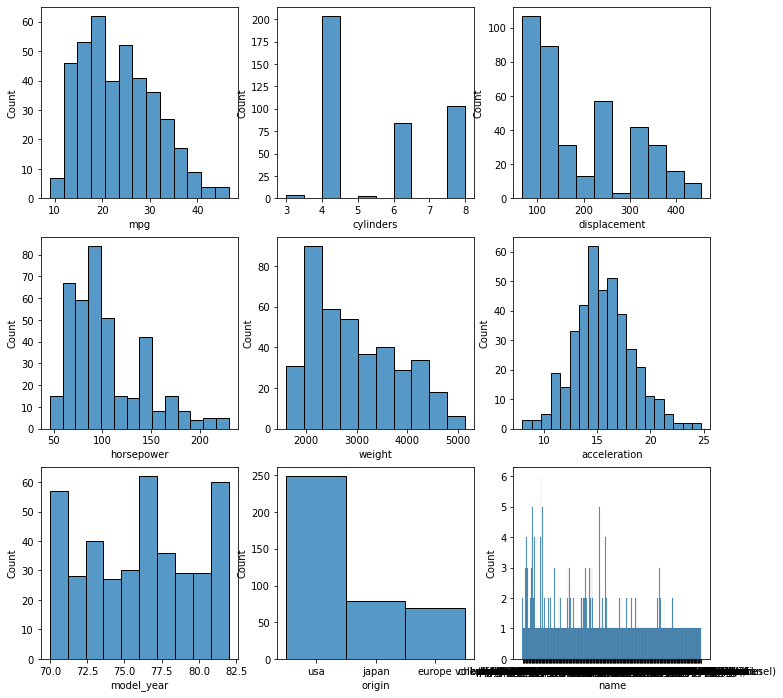

In [ ]:
f, axes = plt.subplots(3,3, figsize = (12,12))
axes = axes.flatten()
for col, ax in zip(df.columns, axes) :
  sns.histplot(data = df, x=col, ax=ax)
plt.show()

* 자료형 정리하기

In [ ]:
nums = ['displacement', 'horsepower', 'weight', 'acceleration'] # 연속형(continual)
noms = ['cylinders', 'model_year', 'origin']    # 이산/범주(nominal)
y = 'mpg' # 예측값
print('연속형 자료', nums)
print('범주 / 이산 자료', noms)
print('예측할 범주', y)
print('추가 전처리가 필요한 속성 : name')

연속형 자료 ['displacement', 'horsepower', 'weight', 'acceleration']
범주 / 이산 자료 ['cylinders', 'model_year', 'origin']
예측할 범주 mpg
추가 전처리가 필요한 속성 : name


* 데이터 정리하기
  * 데이터 소개 : 1970년 후반 ~ 1980년 초반의 mpg(자동차 연비)를 예측한다.
  * 자료형 소개
    * 연속 자료형
      * mpg : 자동차 연비 (예측값)
      * displacement: 배수량
      * horspower: 마력
      * acceleration : 가속도
    * 이산 자료형
      * cylinders: 실린더 개수
      * weight: 자동차 무게
      * model_year: 자동차 모델의 연도
    * 범주 자료형
      * origin: 제조국
      * name: 자동차명
  * 모델링을 위한 자료형 구분
      * 연속 ->
      * 이산 -> 







## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

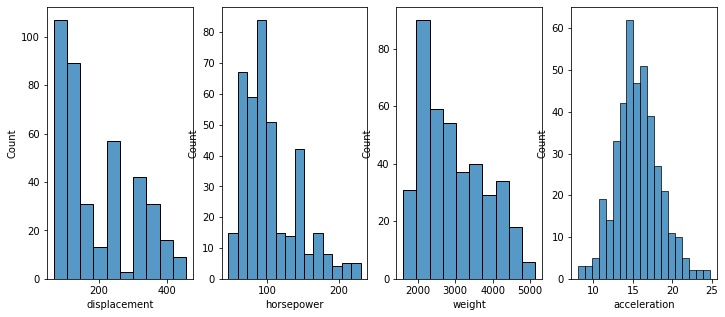

In [ ]:
f, axes = plt.subplots(1, len(nums), figsize = (12,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.histplot(data = df, x=col, ax=ax)
plt.show()

* 이산 자료형 분포 그리기

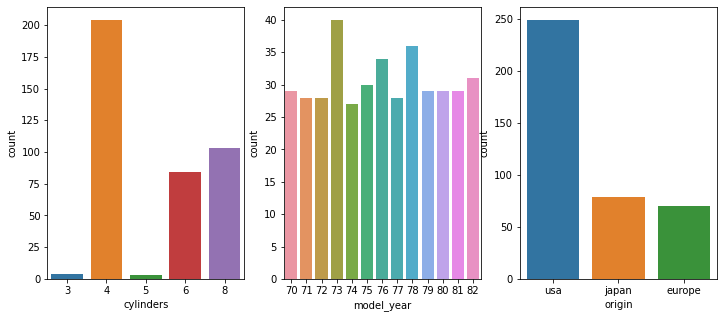

In [ ]:
f, axes = plt.subplots(1, len(noms), figsize = (12,5))
axes = axes.flatten()
for col, ax in zip(noms, axes) :
  sns.countplot(data = df, x=col, ax=ax)
plt.show()

### | **기술 통계량 시각화**

* 기술통계량 확인

In [ ]:
df.describe()  # -> 이 통계량들을 포함해서 시각화 하는것이 기술 통계량 시각화

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


* `boxplot` 으로 연속 자료형 기술 통계 시각화하기

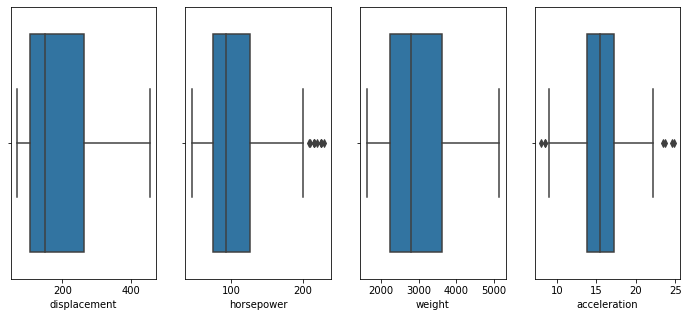

In [ ]:
f, axes = plt.subplots(1, len(nums), figsize = (12,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.boxplot(data = df, x=col, ax=ax)
plt.show()

* `viloinplot` 으로 연속 자료형 기술 통계 시각화하기

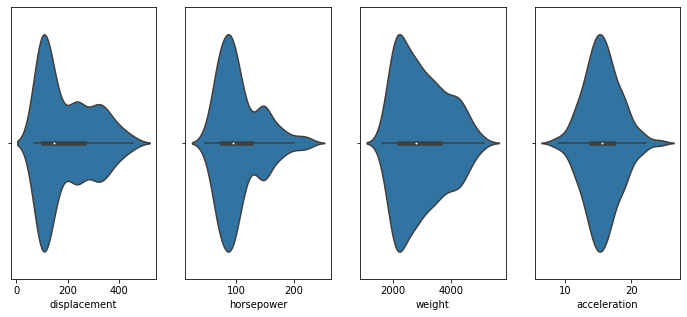

In [ ]:
f, axes = plt.subplots(1, len(nums), figsize = (12,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.violinplot(data = df, x=col, ax=ax)
plt.show()

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

In [ ]:
df.skew()

mpg             0.457066
cylinders       0.526922
displacement    0.719645
horsepower      1.087326
weight          0.531063
acceleration    0.278777
model_year      0.011535
dtype: float64

* `kurt` 이용해 첨도 구하기

In [ ]:
df.kurt()


mpg            -0.510781
cylinders      -1.376662
displacement   -0.746597
horsepower      0.696947
weight         -0.785529
acceleration    0.419497
model_year     -1.181232
dtype: float64

### **| 예측값에 대한 추가 시각화**

* displot으로 그리기


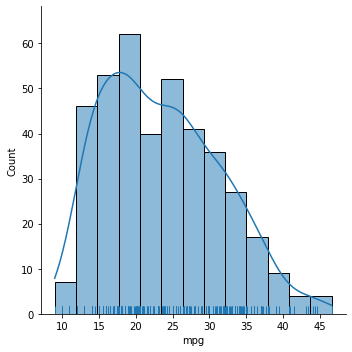

In [ ]:
sns.displot(data = df, x=y, kde = True, rug = True)

* `boxplot`으로 기술통계 시각화 하기

In [ ]:
df1 = df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
def minmax(X) :
  return (X-min(X))/(max(X)-min(X))

df1 = df[nums]

In [ ]:
# nums minmax 스케일링

for num in nums :
  df1[num] = minmax(df1[num])
df1.head()

,displacement,horsepower,weight,acceleration
0,0.617571,0.456522,0.536150,0.238095
1,0.728682,0.646739,0.589736,0.208333
2,0.645995,0.565217,0.516870,0.178571
3,0.609819,0.565217,0.516019,0.238095
4,0.604651,0.510870,0.520556,0.148810


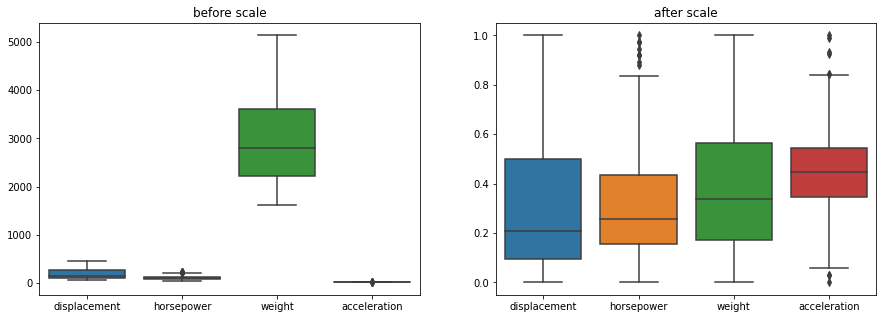

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data = df[nums])
plt.title('before scale')

plt.subplot(1,2,2)
sns.boxplot(data = df1)
plt.title('after scale')
plt.show()

* `violinplot`으로 기술통계 시각화 하기

* `describe` 로 `mpg`의 기술통계 값 구하기

In [ ]:
df['mpg'].describe()

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

* `mpg` 를 `agg` 를 이용해 여러가지 통계량 구하기

In [ ]:
# 여러개의 통계량을 구할 수 있다.
df.mpg.agg( [ 'mean', 'min', 'max', 'skew', 'kurt' ] )   # 통계량을 문자열로 작성

mean    23.514573
min      9.000000
max     46.600000
skew     0.457066
kurt    -0.510781
Name: mpg, dtype: float64

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

In [ ]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


* `style.background_gradient` 이용해 상관계수 시각화 하기

In [ ]:
df.corr().style.background_gradient(cmap = 'coolwarm')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


* `heatmap` 이용해 상관계수 시각화 하기

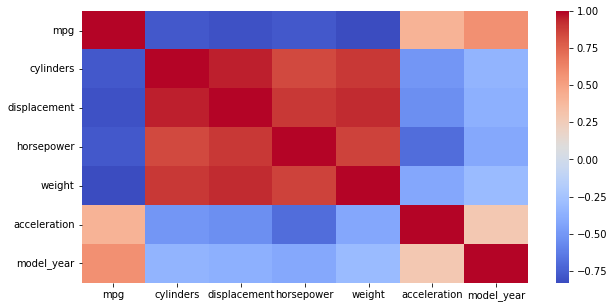

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap = 'coolwarm')

* 예측값과 관련있는 속성 순서대로 정리하기

In [ ]:
# 실린더 개수가 많을수록 무게 증가, 마력 증가, 배기량 증가
# 실린더 개수가 많을 수록 연비가 낮다 (무게, 마력, 배기량과 음의 상관관계)

### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

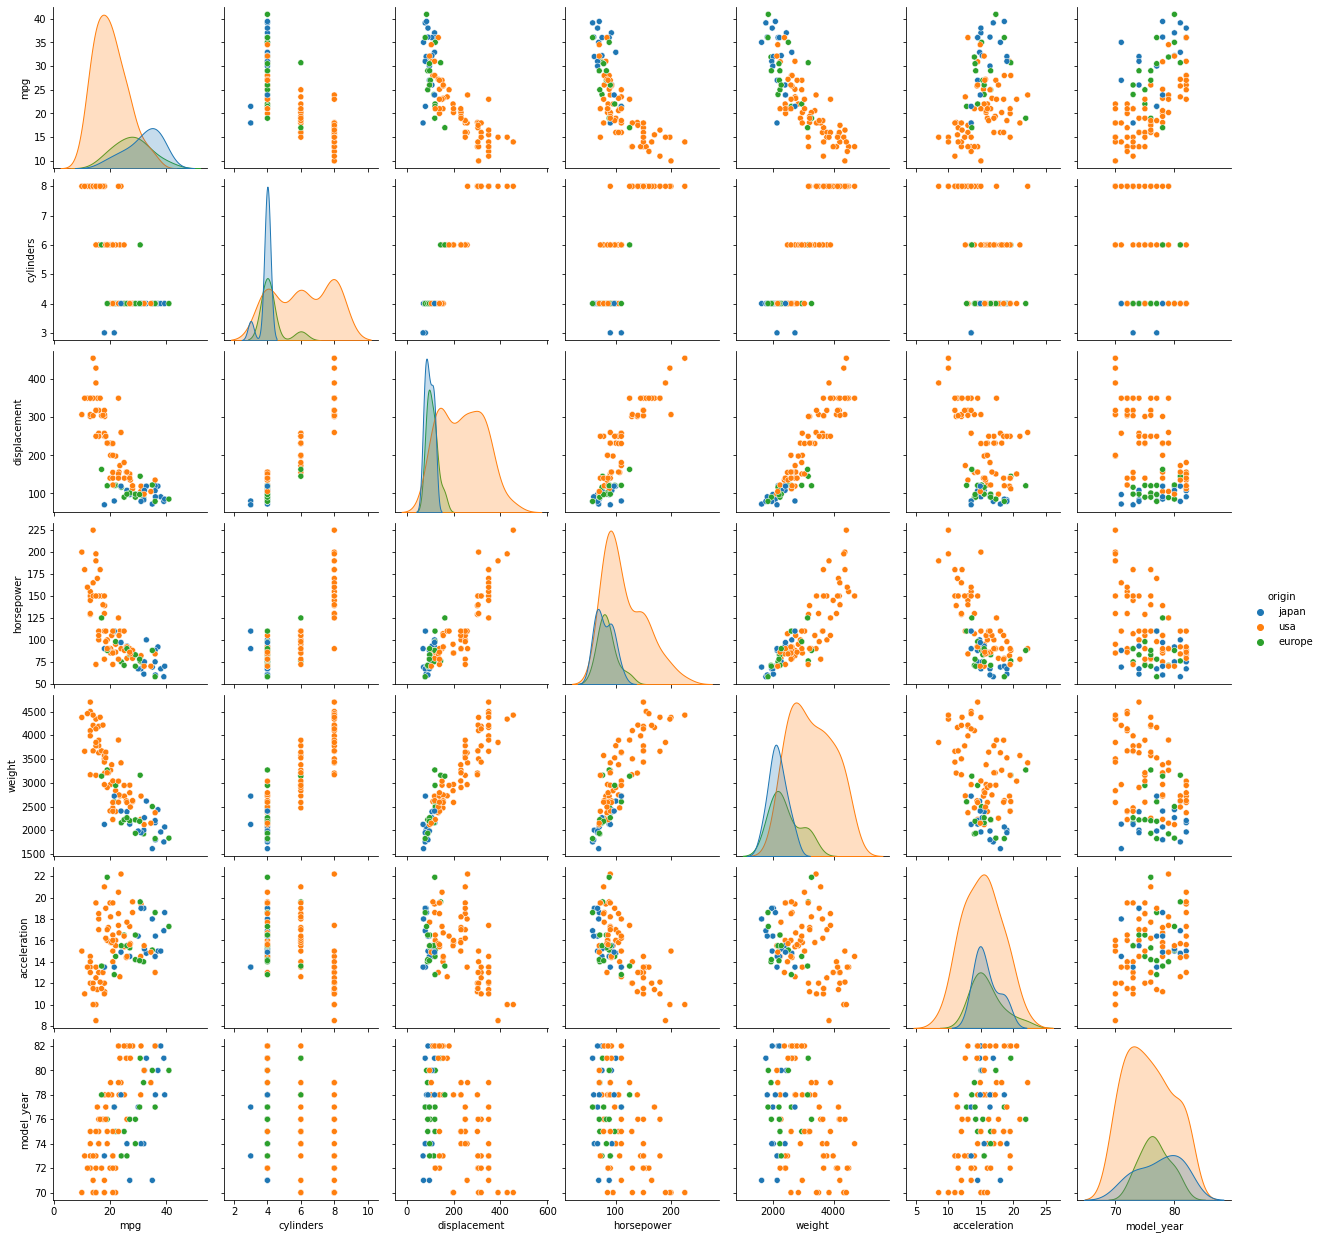

In [ ]:
# pairplot은 시간이 오래걸린다. 따라서 소량의 샘플을 그리는게 좋다.
# df.sample(100) # 데이터 프레임 안에서 샘플 100개 뽑기
sns.pairplot(df.sample(100), hue = 'origin')

* `boxplot`으로 범주 속성별 예측값 관계 시각화하기

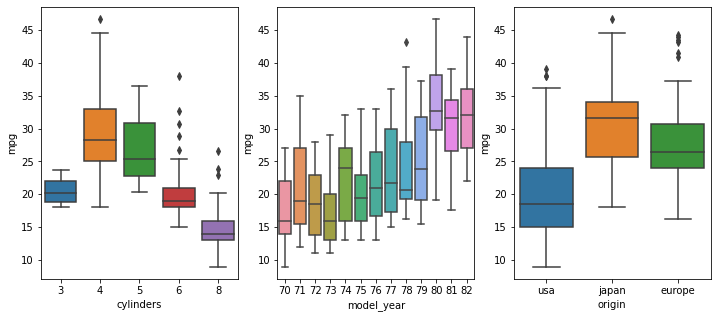

In [ ]:
# x = 범주 자료형, y = mpg (연비)
# noms

f, axes = plt.subplots(1, len(noms), figsize = (12,5))
axes = axes.flatten()
for col, ax in zip(noms, axes) :
  sns.boxplot(data = df, x=col, y = 'mpg', ax= ax)
plt.show()

* 최신모델일수록 연비가 좋아진다

* `scatterplot` 이용해 연속 자료형 별 예측값의 관계 시각화하기

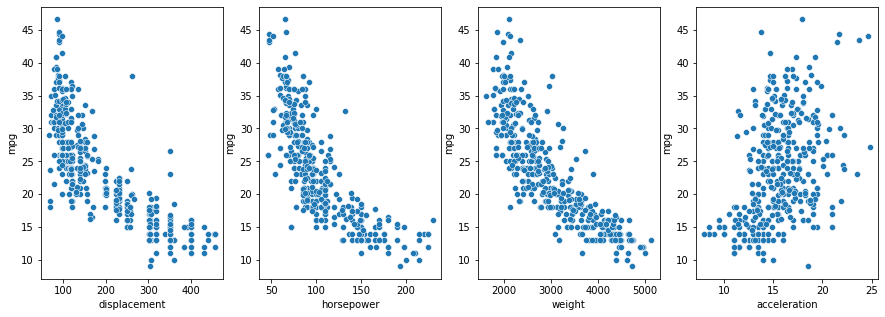

In [ ]:
# 연속형과 연속형을 비교
# x = 연속자료형, y = mpg

f, axes = plt.subplots(1, len(nums), figsize = (15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.scatterplot(data = df, x=col, y = 'mpg', ax= ax)
plt.show()

* `hue` 옵션에 `origin` 추가해서 그리기 

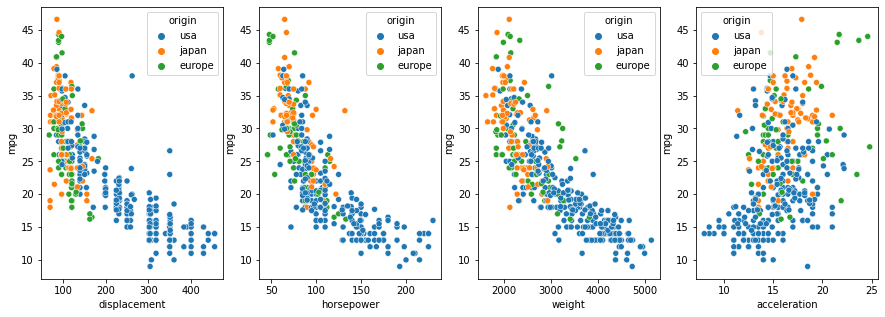

In [ ]:

f, axes = plt.subplots(1, len(nums), figsize = (15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.scatterplot(data = df, x=col, y = 'mpg', ax= ax, hue = 'origin')
plt.show()

* `regplot`으로 회귀 시각화

In [ ]:
# regression(회귀)선을 그려준다

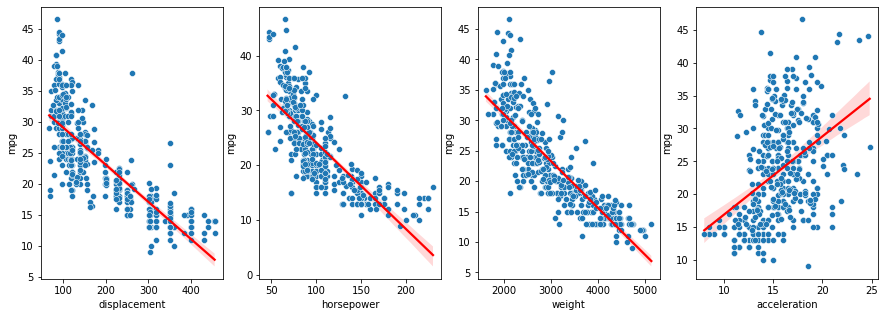

In [ ]:
f, axes = plt.subplots(1, len(nums), figsize = (15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.regplot(data = df, x=col, y = 'mpg', ax= ax, marker = '', color = 'r')
  sns.scatterplot(data = df, x= col, y = 'mpg', ax= ax)
plt.show()

* `residplot`으로 잔차 시각화

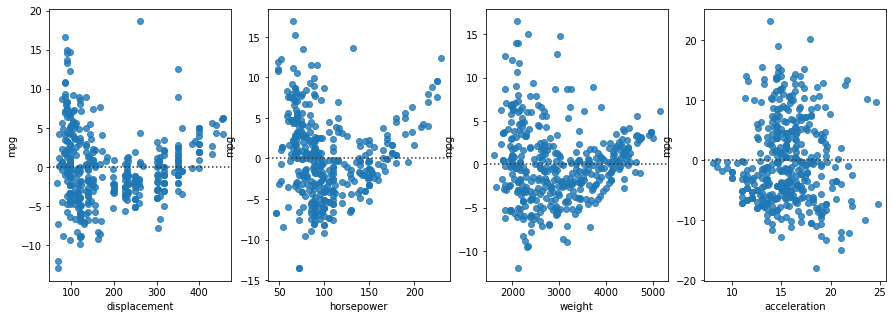

In [ ]:
f, axes = plt.subplots(1, len(nums), figsize = (15,5))
axes = axes.flatten()
for col, ax in zip(nums, axes) :
  sns.residplot(data = df, x=col, y = 'mpg', ax= ax)
plt.show()

# 회귀선이 0에 있는 점선이 된것.
# 잔차 : 회귀선에서 얼마나 떨어져 있는가

* `lmplot`으로 `origin`별 회귀 시각화

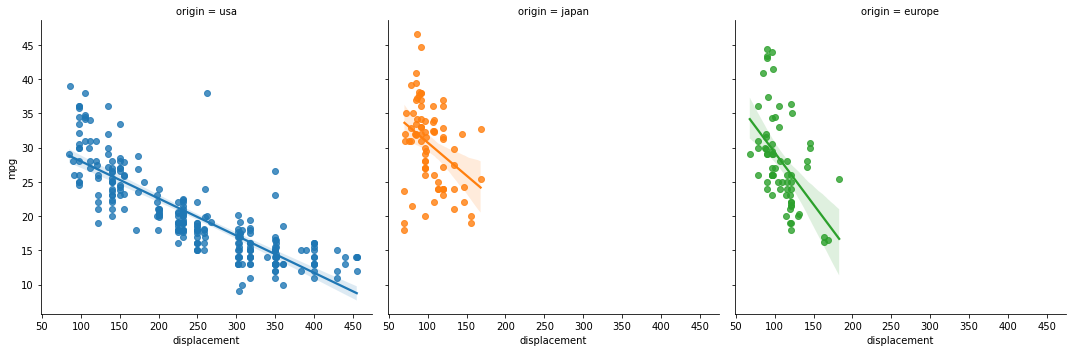

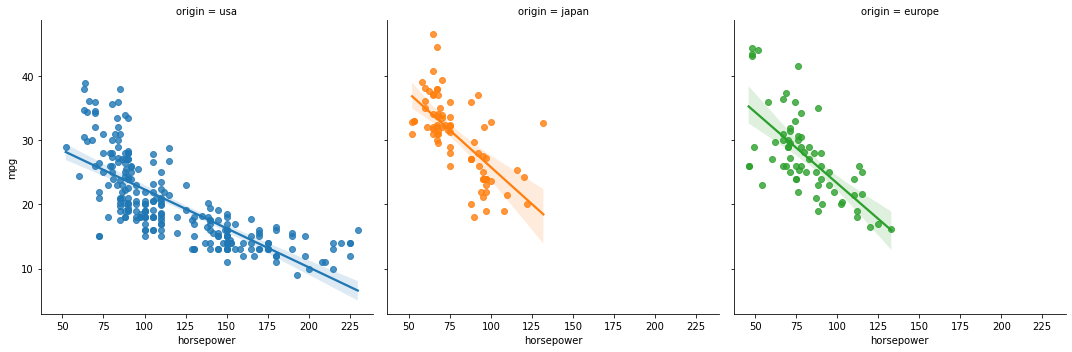

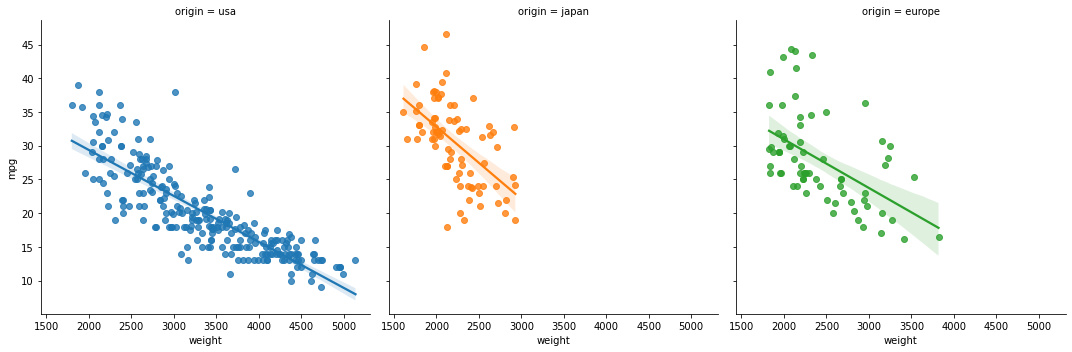

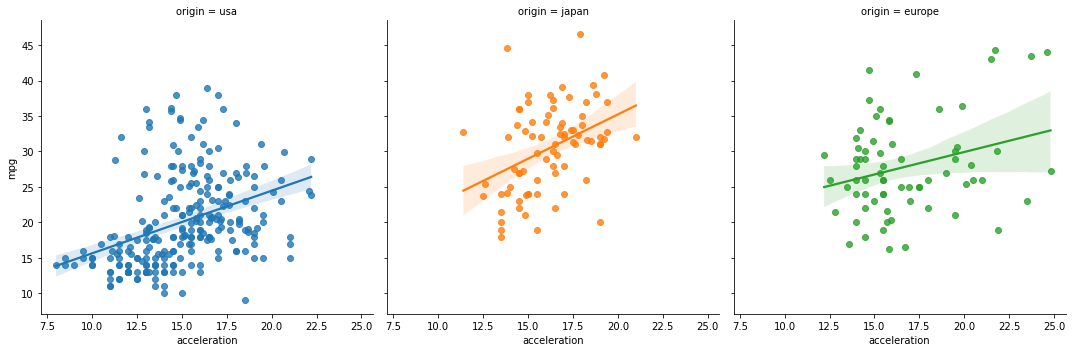

In [ ]:
for col in nums :
  sns.lmplot(data = df, x=col, y = 'mpg', hue = 'origin', col = 'origin')
plt.show()


In [ ]:
# 데이터 전처리

nums, noms

(['displacement', 'horsepower', 'weight', 'acceleration'],
 ['cylinders', 'model_year', 'origin'])

In [ ]:
# nums -> min/max, z-score 스케일링
# cylinders, model_year 이산형, 순서가 존재 0,1,2,3
# cylinders = 1,2,3,4,.... -> 0,1,2,3,4,....
# model_year = 1978, 1979, .... -> 0,1,2,3,...
# origin = 미국 일본 유럽 -> 원-핫 인코딩 -> [1,0,0], [0,1,0],...
# 결측값 처리
# name 속성 추가 전처리

In [ ]:
def minmax(X) :
  return (X-min(X))/(max(X)-min(X))

['displacement', 'horsepower', 'weight', 'acceleration']

In [ ]:
# nums minmax 스케일링

for num in nums :
  df[num] = minmax(df[num])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,0.617571,0.456522,0.536150,0.238095,70,usa,chevrolet chevelle malibu
1,15.0,8,0.728682,0.646739,0.589736,0.208333,70,usa,buick skylark 320
2,18.0,8,0.645995,0.565217,0.516870,0.178571,70,usa,plymouth satellite
3,16.0,8,0.609819,0.565217,0.516019,0.238095,70,usa,amc rebel sst
4,17.0,8,0.604651,0.510870,0.520556,0.148810,70,usa,ford torino


In [ ]:
print(df['cylinders'].unique(), df['model_year'].unique())

[8 4 6 3 5] [70 71 72 73 74 75 76 77 78 79 80 81 82]


In [ ]:
# cylinders 와 model_year 의 크기 줄이기

df['cylinders'] = df['cylinders'].replace({3:0,4:1,5:2,6:3,8:4})

for i,j in zip(df['model_year'].unique(), range(len(df['model_year']))) :
  df['model_year'] = df['model_year'].replace({i:j})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,4,0.617571,0.456522,0.536150,0.238095,0,usa,chevrolet chevelle malibu
1,15.0,4,0.728682,0.646739,0.589736,0.208333,0,usa,buick skylark 320
2,18.0,4,0.645995,0.565217,0.516870,0.178571,0,usa,plymouth satellite
3,16.0,4,0.609819,0.565217,0.516019,0.238095,0,usa,amc rebel sst
4,17.0,4,0.604651,0.510870,0.520556,0.148810,0,usa,ford torino


In [ ]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
# origin one-hot 인코딩
one_hot = pd.get_dummies(df['origin'])
a = np.array(one_hot)
df['origin'] = a
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,4,0.617571,0.456522,0.536150,0.238095,0,0,chevrolet chevelle malibu
1,15.0,4,0.728682,0.646739,0.589736,0.208333,0,0,buick skylark 320
2,18.0,4,0.645995,0.565217,0.516870,0.178571,0,0,plymouth satellite
3,16.0,4,0.609819,0.565217,0.516019,0.238095,0,0,amc rebel sst
4,17.0,4,0.604651,0.510870,0.520556,0.148810,0,0,ford torino


In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
df.dropna()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,4,0.617571,0.456522,0.536150,0.238095,0,0,chevrolet chevelle malibu
1,15.0,4,0.728682,0.646739,0.589736,0.208333,0,0,buick skylark 320
2,18.0,4,0.645995,0.565217,0.516870,0.178571,0,0,plymouth satellite
3,16.0,4,0.609819,0.565217,0.516019,0.238095,0,0,amc rebel sst
4,17.0,4,0.604651,0.510870,0.520556,0.148810,0,0,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,1,0.186047,0.217391,0.333711,0.452381,12,0,ford mustang gl
394,44.0,1,0.074935,0.032609,0.146583,0.988095,12,1,vw pickup
395,32.0,1,0.173127,0.206522,0.193365,0.214286,12,0,dodge rampage
396,28.0,1,0.134367,0.179348,0.286929,0.630952,12,0,ford ranger


In [ ]:
list1 = []
list2 = []
for i in range(len(df['name'])) :
  list1.append(df["name"].str.split(" ")[i][1:])
for i in range(len(df['name'])) :
  list2.append(df["name"].str.split(" ")[i][0])

df2 = pd.DataFrame({'brand' : list2, 'car_name' : list1})
df = pd.concat([df,df2], axis = 1)
df = df.drop(['name'], axis = 1)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet,"[chevelle, malibu]"
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick,"[skylark, 320]"
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth,[satellite]
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc,"[rebel, sst]"
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford,[torino]
